In [1]:
#standard modules
import os
import glob
from Bio.PDB import Polypeptide as pp

#import mdanalyis modules and packages
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align, distances

#matplotlib
from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
import matplotlib as mpl

#numpy
import numpy as np

#pandas
import pandas as pd

#nglview
import nglview as nv

#seaborn
import seaborn as sns

#scipy
from scipy.stats import gaussian_kde

#sklearn
from sklearn import preprocessing

In [2]:
project_path = '/Users/javingfun/Library/CloudStorage/OneDrive-UCSanDiego/UCSD/PhD/Active/mpro-trajectories'

#apo path
apo_path = os.path.join(project_path,'mpro_apo')

apo_monomer_path = os.path.join(apo_path,'mpro_apo_monomer')
apo_dimer_path = os.path.join(apo_path,'mpro_apo_dimer')

#ens_path
ens_path = os.path.join(project_path,'mpro_ens')

ens_monomer_path = os.path.join(ens_path,'mpro_ens_monomer')
ens_dimer_path = os.path.join(ens_path,'mpro_ens_dimer')
ens_dimer_asym_path = os.path.join(ens_path,'mpro_ens_dimer_asym')

#nirm_path
nirm_path = os.path.join(project_path,'mpro_nirm')

nirm_monomer_path = os.path.join(nirm_path,'mpro_nirm_monomer')
nirm_dimer_path = os.path.join(nirm_path,'mpro_nirm_dimer')
nirm_dimer_asym_path = os.path.join(nirm_path,'mpro_nirm_dimer_asym')

#nat_path
nat_path = os.path.join(project_path,'mpro_nat')

nat_monomer_path = os.path.join(nat_path,'mpro_nat_monomer')
nat_dimer_path = os.path.join(nat_path,'mpro_nat_dimer')
nat_dimer_asym_path = os.path.join(nat_path,'mpro_nat_dimer_asym')

In [4]:
def make_universe(path,replica):
    
    #obtain trajectory and topology from file, create a universe
    if replica== 0:
        topology = glob.glob(os.path.join(path,'*.pdb'))
        u = mda.Universe(topology[0],in_memory=True)
        
    
    else:
        topology = glob.glob(os.path.join(path,'*.prmtop'))
        trajectory = glob.glob(os.path.join(path, '*{rep}.nc'.format(rep=replica))) 
        u = mda.Universe(topology[0], trajectory[0],in_memory=True)
        
    return u

In [5]:
print(apo_monomer_path)

/Users/javingfun/Library/CloudStorage/OneDrive-UCSanDiego/UCSD/PhD/Active/mpro-trajectories/mpro_apo/mpro_apo_monomer


In [6]:
#apo 
am_0 = make_universe(apo_monomer_path,0)
am_1 = make_universe(apo_monomer_path,1)
am_2 = make_universe(apo_monomer_path,2)
am_3 = make_universe(apo_monomer_path,3)

ad_0 = make_universe(apo_dimer_path,0)
ad_1 = make_universe(apo_dimer_path,1)
ad_2 = make_universe(apo_dimer_path,2)
ad_3 = make_universe(apo_dimer_path,3)

#nat 
pm_0 = make_universe(nat_monomer_path,0)
pm_1 = make_universe(nat_monomer_path,1)
pm_2 = make_universe(nat_monomer_path,2)
pm_3 = make_universe(nat_monomer_path,3)

pd_0 = make_universe(nat_dimer_path,0)
pd_1 = make_universe(nat_dimer_path,1)
pd_2 = make_universe(nat_dimer_path,2)
pd_3 = make_universe(nat_dimer_path,3)

pa_0 = make_universe(nat_dimer_asym_path,0)
pa_1 = make_universe(nat_dimer_asym_path,1)
pa_2 = make_universe(nat_dimer_asym_path,2)
pa_3 = make_universe(nat_dimer_asym_path,3)

#nirm 
nm_0 = make_universe(nirm_monomer_path,0)
nm_1 = make_universe(nirm_monomer_path,1)
nm_2 = make_universe(nirm_monomer_path,2)
nm_3 = make_universe(nirm_monomer_path,3)

nd_0 = make_universe(nirm_dimer_path,0)
nd_1 = make_universe(nirm_dimer_path,1)
nd_2 = make_universe(nirm_dimer_path,2)
nd_3 = make_universe(nirm_dimer_path,3)

na_0 = make_universe(nirm_dimer_asym_path,0)
na_1 = make_universe(nirm_dimer_asym_path,1)
na_2 = make_universe(nirm_dimer_asym_path,2)
na_3 = make_universe(nirm_dimer_asym_path,3)

#ens 
em_0 = make_universe(ens_monomer_path,0)
em_1 = make_universe(ens_monomer_path,1)
em_2 = make_universe(ens_monomer_path,2)
em_3 = make_universe(ens_monomer_path,3)

ed_0 = make_universe(ens_dimer_path,0)
ed_1 = make_universe(ens_dimer_path,1)
ed_2 = make_universe(ens_dimer_path,2)
ed_3 = make_universe(ens_dimer_path,3)

ea_0 = make_universe(ens_dimer_asym_path,0)
ea_1 = make_universe(ens_dimer_asym_path,1)
ea_2 = make_universe(ens_dimer_asym_path,2)
ea_3 = make_universe(ens_dimer_asym_path,3)

/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/core/universe.py:658: UserWarning: Reader has no dt information, set to 1.0 ps
  dt=self.trajectory.ts.dt * step,
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:442: UserWarning: PDB file contained CONECT record to TER entry. These are not included in bonds.
  warnings.warn(
/Users/javingfun/miniconda3/envs/mdaenv/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:331: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


In [7]:
#Make lists from systems

#apo
am_list = [am_1,am_2,am_3]
ad_list = [ad_1,ad_2,ad_3]

#nirm
nm_list = [nm_1,nm_2,nm_3]
nd_list = [nd_1,nd_2,nd_3]
na_list = [na_1,na_2,na_3]

#ens
em_list = [em_1,em_2,em_3]
ed_list = [ed_1,ed_2,ed_3]
ea_list = [ea_1,ea_2,ea_3]

#nat
pm_list = [pm_1,pm_2,pm_3]
pd_list = [pd_1,pd_2,pd_3]
pa_list = [pa_1,pa_2,pa_3]

In [8]:
#for every system replica [1,2,3]
#calculate rmsf on backbone ca atoms

#calculate runnning rmsf from all three replicas
#append all three rmsf and running average to numpy array 

#import rmsf plot as a library
#Make lists from systems

In [9]:
def calc_rmsf(rep_list,ref,state):
        
    # Calculate the RMSF for a given replica
    def get_rmsf(rep,ref,state):
        
        # Generate average structure to use as reference
        average = align.AverageStructure(rep,ref,select='backbone and name CA',ref_frame=0).run()
        
        # Align trajectory to reference
        aligner = align.AlignTraj(rep,ref,select='backbone and name CA',in_memory=True).run()  
        
        
        # Logic for processing monomeric/dimeric forms
        if state == 'monomer':
            c_alphas = rep.select_atoms('resid 1 to 306 and name CA')
            
        elif state == 'dimer':
            c_alphas = rep.select_atoms('resid 1 to 612 and name CA')
        
        # Run rmsf calculation
        R = rms.RMSF(c_alphas).run()
        
        # Obtain RMSF column and return as variable
        rmsf_per_rep = R.results.rmsf
        
        return rmsf_per_rep
        
        
    # Obtain RMSF by iterating over each of the replicate runs in a list

    # Append RMSF results for a given run to a dictionary
    rmsf_dict = {}
    count = 1
    

    # For every replica in the list of replicas
    for rep in rep_list:
        
        # Run RMSF calculation
        rep_rmsf = get_rmsf(rep,ref,state)
        
        # Append to dictionary with rep name
        rmsf_dict['rep_' + str(count)] = rep_rmsf
        count += 1
    
    # Calculate and append running average to dictionary
    
    # Create dataframe from RMSF dictionary, calculate Mean
    rmsf_dict_df = pd.DataFrame(rmsf_dict)
    rmsf_dict_df['Mean'] = rmsf_dict_df.mean(axis=1)
    
    # Logic for calculating mean of monomer/dimer state
    if state == 'monomer':
        
        # If monomer, return the RMSF as an average of all three runs
        return rmsf_dict_df['Mean']
    
    if state == 'dimer':
        
        # Break down means into two DataFrames representing the means of chains A and B
        rmsf_a = rmsf_dict_df[0:306]['Mean'].values
        rmsf_b = rmsf_dict_df[306:613]['Mean'].values
        
        # Create new DataFrame with the RMSF values in chains A and B
        rmsf_mean_df = pd.DataFrame({'rmsf_a':rmsf_a,'rmsf_b':rmsf_b})

        # Calculate the mean accross chains for the same residues
        rmsf_mean_df['Mean'] = rmsf_mean_df.mean(axis=1)
        
        # Normalize the mean RMSF between chains A and B
        #rmsf_norm_df = (rmsf_mean_df['Mean'] - rmsf_mean_df['Mean'].min())/(rmsf_mean_df['Mean'].max() - rmsf_mean_df['Mean'].min())
        
        # Return normalized value
        return rmsf_mean_df['Mean']
        
        
    


In [10]:
am_rmsf = calc_rmsf(am_list,am_0,'monomer')
nm_rmsf = calc_rmsf(nm_list,nm_0,'monomer')
em_rmsf = calc_rmsf(em_list,em_0,'monomer')
pm_rmsf = calc_rmsf(pm_list,pm_0,'monomer')


ad_rmsf = calc_rmsf(ad_list,ad_0,'dimer')
nd_rmsf = calc_rmsf(nd_list,nd_0,'dimer')
ed_rmsf = calc_rmsf(ed_list,ed_0,'dimer')
pd_rmsf = calc_rmsf(pd_list,pd_0,'dimer')

In [12]:
ad_rmsf,nd_rmsf

(0      0.837092
 1      0.760863
 2      0.698923
 3      0.709251
 4      0.702398
          ...   
 301    2.026824
 302    2.236325
 303    2.663400
 304    3.581668
 305    4.386328
 Name: Mean, Length: 306, dtype: float64,
 0      1.273725
 1      0.918053
 2      0.753295
 3      0.728124
 4      0.742626
          ...   
 301    1.148517
 302    1.036158
 303    1.154086
 304    1.624165
 305    1.996534
 Name: Mean, Length: 306, dtype: float64)

### Create Table

In [50]:
mpro_seq = ad_0.select_atoms('resid 0 to 306').residues.resnames
mpro_seq_one_letter = []
count = 1
for aa in mpro_seq:
    if aa == 'HID' or aa == 'HIE':
        aa = 'HIS'
    
    mpro_seq_one_letter.append(str(count) + pp.three_to_one(aa))
    count += 1
    
mpro_seq_one_letter

['1S',
 '2G',
 '3F',
 '4R',
 '5K',
 '6M',
 '7A',
 '8F',
 '9P',
 '10S',
 '11G',
 '12K',
 '13V',
 '14E',
 '15G',
 '16C',
 '17M',
 '18V',
 '19Q',
 '20V',
 '21T',
 '22C',
 '23G',
 '24T',
 '25T',
 '26T',
 '27L',
 '28N',
 '29G',
 '30L',
 '31W',
 '32L',
 '33D',
 '34D',
 '35V',
 '36V',
 '37Y',
 '38C',
 '39P',
 '40R',
 '41H',
 '42V',
 '43I',
 '44C',
 '45T',
 '46S',
 '47E',
 '48D',
 '49M',
 '50L',
 '51N',
 '52P',
 '53N',
 '54Y',
 '55E',
 '56D',
 '57L',
 '58L',
 '59I',
 '60R',
 '61K',
 '62S',
 '63N',
 '64H',
 '65N',
 '66F',
 '67L',
 '68V',
 '69Q',
 '70A',
 '71G',
 '72N',
 '73V',
 '74Q',
 '75L',
 '76R',
 '77V',
 '78I',
 '79G',
 '80H',
 '81S',
 '82M',
 '83Q',
 '84N',
 '85C',
 '86V',
 '87L',
 '88K',
 '89L',
 '90K',
 '91V',
 '92D',
 '93T',
 '94A',
 '95N',
 '96P',
 '97K',
 '98T',
 '99P',
 '100K',
 '101Y',
 '102K',
 '103F',
 '104V',
 '105R',
 '106I',
 '107Q',
 '108P',
 '109G',
 '110Q',
 '111T',
 '112F',
 '113S',
 '114V',
 '115L',
 '116A',
 '117C',
 '118Y',
 '119N',
 '120G',
 '121S',
 '122P',
 '123S',
 

### Plot RMSF into graph

In [16]:
data_monomer = {"Apo RMSF":am_rmsf,
                "Nirm RMSF": nm_rmsf,
                "Ens RMSF":em_rmsf,
                "Pep RMSF": pm_rmsf,
                "Nat/Apo Net RMSF":pm_rmsf/am_rmsf,
                "Ens/Apo Net RMSF":em_rmsf/am_rmsf,
                "Nirm/Apo Net RMSF":nm_rmsf/am_rmsf,                
               }

data_df = pd.DataFrame(data_monomer)

# Create column with net difference RMSF between apo and nirmatrelvir dimers
data_df

,Apo RMSF,Nirm RMSF,Ens RMSF,Pep RMSF,Nat/Apo Net RMSF,Ens/Apo Net RMSF,Nirm/Apo Net RMSF
0,5.456067,6.815993,7.318160,5.893608,1.080193,1.341288,1.249250
1,3.797521,4.939413,5.674910,4.128626,1.087190,1.494372,1.300694
2,2.097248,3.403920,3.892498,2.728382,1.300934,1.856002,1.623041
3,1.577229,3.306880,2.911372,2.312568,1.466223,1.845878,2.096640
4,1.463276,2.894839,1.880524,2.148754,1.468454,1.285146,1.978327
...,...,...,...,...,...,...,...
301,3.303734,5.660451,5.957589,5.310028,1.607281,1.803290,1.713349
302,4.159539,7.372249,7.476952,7.007962,1.684793,1.797544,1.772372
303,5.268868,9.174003,9.424376,8.625502,1.637069,1.788691,1.741172
304,6.085172,10.853746,11.572322,10.507218,1.726692,1.901725,1.783638


IndexError: index 4 is out of bounds for axis 0 with size 4

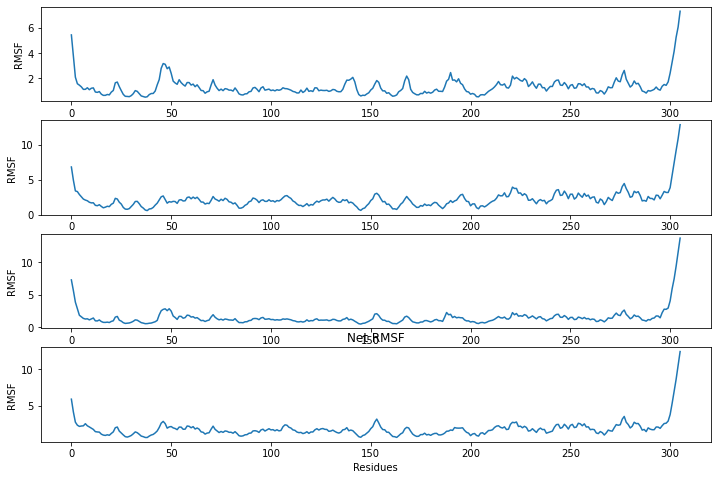

In [19]:
def plot_per_residue(df,save=False):
    ligands = data_df.columns.to_list()
    fig, axes = plt.subplots(4, 1,figsize=(12,8))
    axes = axes.flatten()  # Flatten 2x2 array to make indexing easier
    
    for idx,column in enumerate(ligands):
        if column == 'Residue': continue
        axes[idx].plot(data_df[column])
        axes[idx].set_xlabel('Residues')
        axes[idx].set_ylabel('RMSF')
        plt.title('Net RMSF')
        
plot_per_residue(data_df,save=True)

In [ ]:
def plot_per_residue(df,save=False):
    ligands = ['Apo RMSF','Nirm RMSF','Ens RMSF','Pep RMSF']
    fig, axes = plt.subplots(4, 1,figsize=(12,8))
    axes = axes.flatten()  # Flatten 2x2 array to make indexing easier
    
    for idx,column in enumerate(data_df.columns.to_list()):
        if column == 'Residue': continue
        axes[idx].plot(data_df[column])
        axes[idx].set_xlabel('Residues')
        axes[idx].set_ylabel('RMSF')
        plt.title('Net RMSF')

    for idx,ligand in enumerate(ligands):
        ligand_df = df[df['ligand'] == ligand].sort_values(by='node')
        monomer_df = ligand_df[ligand_df['state'] == 'monomer']
        dimer_a = ligand_df[(ligand_df['state'] == 'dimer') & (ligand_df['chain'] == 'A')]
        dimer_b = ligand_df[(ligand_df['state'] == 'dimer') & (ligand_df['chain'] == 'B')]
        dimer_b['node'] = dimer_b['node'] - 306  # Adjust chain B numbering
        dimer_average = pd.concat([dimer_a, dimer_b]).groupby('node')['normalized_weight'].mean()

        axes[idx].plot(monomer_df['node'], monomer_df['normalized_weight'], label='monomer',color='black')
        axes[idx].plot(dimer_a['node'], dimer_average, label='dimer',color='blue')
        #axes[idx].scatter(dimer_b['node'], dimer_b['normalized_weight'], label='dimer-B',color='gray')
        
        axes[idx].set_xlabel('Residues')
        axes[idx].set_ylabel('Normalized Weight')
        axes[idx].set_title(f'{ligand.capitalize()}')
        axes[idx].grid(True, alpha=0.3)
        axes[idx].set_xlim(1, 306)
        axes[idx].set_ylim(0, 1.1)

        # Only show x-axis labels for bottom subplot
        if idx != len(ligands)-1:  # If not the last subplot
            axes[idx].legend()
            axes[idx].set_xticklabels([])  # Hide x-axis labels
            axes[idx].set_xlabel('')  # Hide x-axis label
        else:  # For the bottom subplot
            axes[idx].set_xlabel('Residues')  # Show x-axis label
    
    plt.tight_layout()
    if save:
        plt.savefig(os.path.join(connecting_path,'figures/node-usage-plot.png'))
    
plot_per_residue(all_node_df,save=True)

In [52]:
data_df.columns.to_list()

['Residue',
 'Apo RMSF',
 'Nirm RMSF',
 'Ens RMSF',
 'Pep RMSF',
 'Nat/Apo Net RMSF',
 'Ens/Apo Net RMSF',
 'Nirm/Apo Net RMSF']

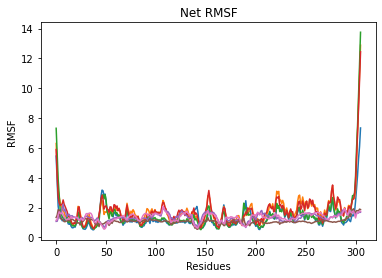

In [53]:
for column in data_df.columns.to_list():
    if column == 'Residue': continue
    plt.plot(data_df[column])
    plt.xlabel('Residues')
    plt.ylabel('RMSF')
    plt.title('Net RMSF')

Text(0.5, 1.0, 'Apo vs. Nirm Mean RMSF')

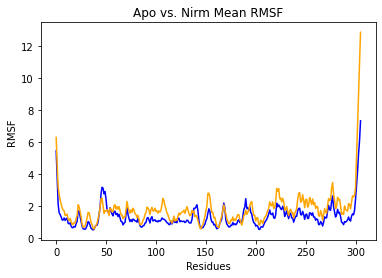

In [54]:
plt.plot(data_df['Apo RMSF'],color='Blue')
plt.plot(data_df['Nirm RMSF'],color='Orange')
plt.xlabel('Residues')
plt.ylabel('RMSF')
plt.title('Apo vs. Nirm Mean RMSF')

In [56]:
data_df.to_csv('~/Downloads/mpro_apo_nirm_rmsf_table.csv')

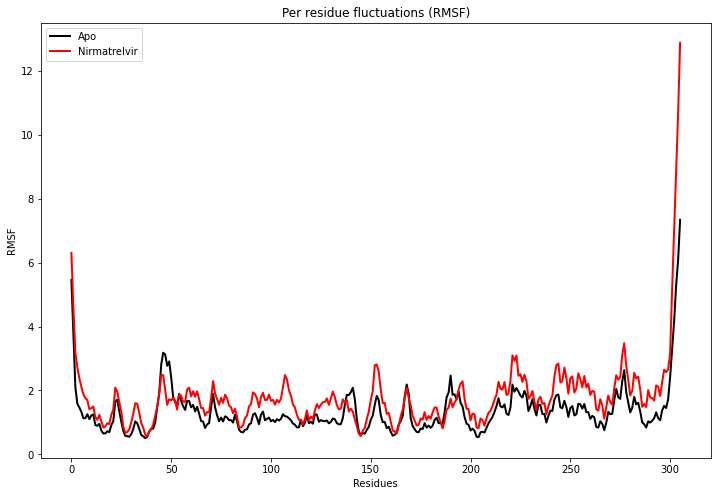

In [55]:
fig = plt.subplots(figsize=(12,8))
plt.plot(data_df['Apo RMSF'],color='black',label='Apo',linestyle='-',linewidth=2)
plt.plot(data_df['Nirm RMSF'],color='red',label='Nirmatrelvir',linestyle='-',linewidth=2)
plt.legend()
plt.ylabel('RMSF')
plt.xlabel('Residues')
plt.title('Per residue fluctuations (RMSF)')
plt.savefig('/Users/javingfun/Downloads/RMSF_normalized.png')

### Export PDB with RMSF mapped into B-factor

In [57]:
# Save PDB file with RMSF mapped into B-factor
def save_rmsf_pdb(u,pdb_path,rmsf):
    
    '''
    Make sure that length array = length selection
    
    Variables:
    u = universe
    pdb_path = where to write pdb file
    rmsf = column from a dataframe (can also be a numpy array)
    '''
    u.add_TopologyAttr('tempfactors') #selects b-factor column
    protein = u.select_atoms('')# select atoms to write b-factor
    
    for residue,r_value in zip(protein.residues,rmsf):
        residue.atoms.tempfactors = r_value
    
    return protein

'''
Example on how to use this (change variables)

path_to_pdb = '/Users/javingfun/Desktop'
save_rmsf_pdb = (ad_0,path_to_pdb,data_df['Apo RMSF'])
save_rmsf_pdb
'''

"\nExample on how to use this (change variables)\n\npath_to_pdb = '/Users/javingfun/Desktop'\nsave_rmsf_pdb = (ad_0,path_to_pdb,data_df['Apo RMSF'])\nsave_rmsf_pdb\n"

In [58]:
data_df['Apo RMSF']

0      5.456067
1      3.797521
2      2.097248
3      1.577229
4      1.463276
         ...   
301    3.303734
302    4.159539
303    5.268868
304    6.085172
305    7.340343
Name: Apo RMSF, Length: 306, dtype: float64

In [59]:
path_to_pdb = '/Users/javingfun/Desktop'
save_rmsf_pdb = (ad_0,path_to_pdb,data_df['Apo RMSF'])
save_rmsf_pdb

(<Universe with 9362 atoms>,
 '/Users/javingfun/Desktop',
 0      5.456067
 1      3.797521
 2      2.097248
 3      1.577229
 4      1.463276
          ...   
 301    3.303734
 302    4.159539
 303    5.268868
 304    6.085172
 305    7.340343
 Name: Apo RMSF, Length: 306, dtype: float64)

In [60]:
type(data_df['Apo RMSF'])

pandas.core.series.Series